## To Explore Unsupervised Machine Learning

"""
#Created on wed 07/05/2020 17:14:21 
#author: Kiran Shinkar
#Email - ki201shinkar@gmail.com
#WhatsApps - +91-9689678025
#LinkedIn - https://www.linkedin.com/in/kiran-shinkar-53960515b/
"""

In [1]:
# libraries required
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans

#### Load Iris dataset

In [3]:
data=pd.read_csv(r"C:\Users\91968\Downloads\spark found\Iris.csv")

In [4]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.drop(['Id'],axis=1,inplace=True)

In [6]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
data['Species'] = LabelEncoder().fit_transform(data['Species'])
data['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [11]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


## Data Visualization

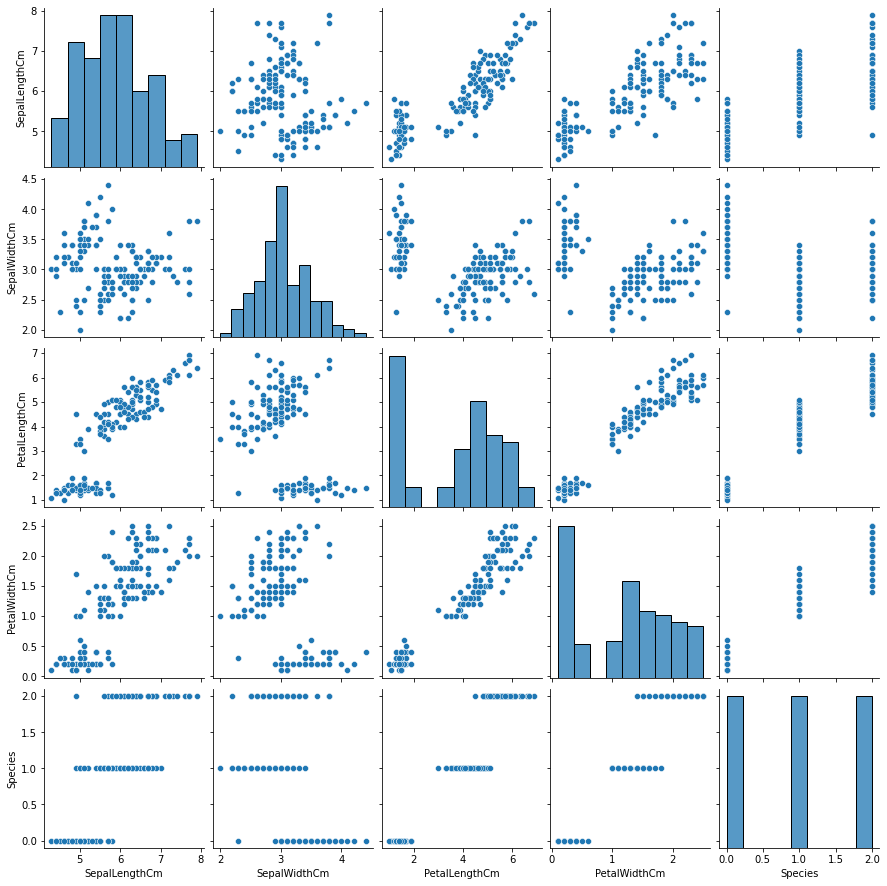

In [12]:
sns.pairplot(data)

<AxesSubplot:>

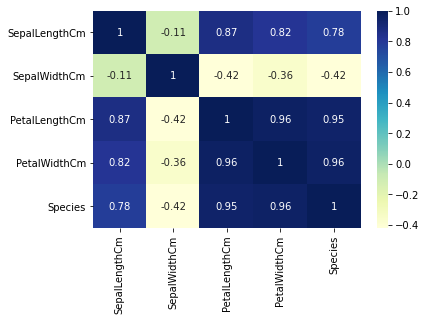

In [13]:
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")

#### The graph shows that species are mainly depend on PetalLengthCm and PetalWidthCm

C:\Users\91968\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

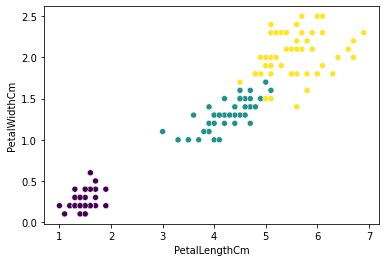

In [14]:
sns.scatterplot(data['PetalLengthCm'],data['PetalWidthCm'],c=data.Species.values)

In [15]:
df = data.values[:,[0,1,2,3]]

In [16]:
df

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [17]:
from sklearn.cluster import KMeans

wsee = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,random_state = 10)
    kmeans.fit(df)
    # inertia method returns wcss for that model
    wsee.append(kmeans.inertia_)

In [18]:
wsee

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.93873974358975,
 34.19846461871464,
 30.236524046129325,
 28.11553453563981,
 25.996554473304478]

### Elbow method to find out optimal value of number of cluster

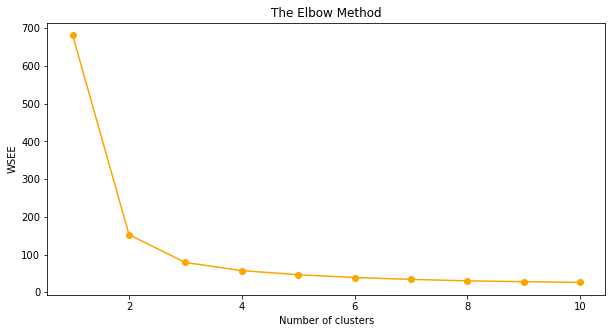

In [19]:
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wsee,marker='o',color='orange')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSEE')
plt.show()

#### The optimum value for K would be 3. As we can see that with an increase in the number of clusters the WSEE value decreases. We select the value for K on the basis of the rate of decrease in WSEE and we can see that after 3 the drop in wsee is minimal.

In [20]:
kmeans = KMeans(n_clusters = 3,random_state = 10)
y_pred = kmeans.fit_predict(df)

In [21]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [22]:
kmeans.n_iter_

5

In [23]:
data["clusters"] = y_pred
data.tail(9)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters
141,6.9,3.1,5.1,2.3,2,2
142,5.8,2.7,5.1,1.9,2,0
143,6.8,3.2,5.9,2.3,2,2
144,6.7,3.3,5.7,2.5,2,2
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2
149,5.9,3.0,5.1,1.8,2,0


## Visualization of clusters

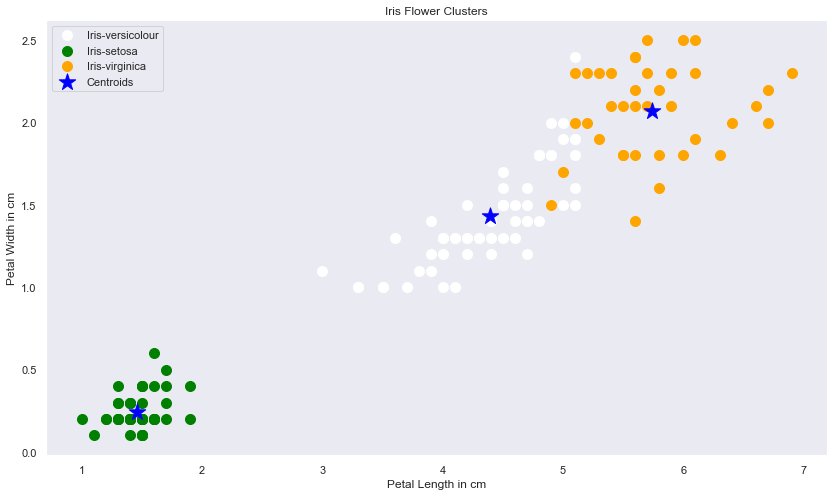

In [24]:
fig = plt.figure(figsize=(14, 8))
sns.set(style='dark')
plt.scatter(df[y_pred == 0, 2], df[y_pred == 0, 3], s = 100, c = 'white', label = 'Iris-versicolour')
plt.scatter(df[y_pred == 1, 2], df[y_pred == 1, 3], s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(df[y_pred == 2, 2], df[y_pred == 2, 3],s = 100, c = 'orange', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 300, c = 'blue',marker='*', 
            label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()

### We can see that our predicted graph is quite similar to the actual one.